# Feature transformation or analysis

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pandas as pd
# from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
data = pd.read_csv('fruits_data_ext.csv')
data.head()

,Unnamed: 0,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,0,1,apple,granny_smith,192.0,8.4,7.3,0.55
1,1,1,apple,granny_smith,180.0,8.0,6.8,0.59
2,2,1,apple,granny_smith,176.0,7.4,7.2,0.60
3,3,2,mandarin,mandarin,86.0,6.2,4.7,0.80
4,4,2,mandarin,mandarin,84.0,6.0,4.6,0.79


In [ ]:
# The iris dataset
X, y = data.iloc[:,4:],data['fruit_label']

## Add some noisy data to degrade features
# random_features = np.random.RandomState(1000).uniform(0, 0.5, size=( X.shape[0] , 20))
# X = np.hstack((X, random_features))
# print (X.shape, y.shape)

# Normalize data to 0-1
X = MinMaxScaler().fit_transform(X)

# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(132, 4) (45, 4) (132,) (45,)


In [ ]:
# Create and train classifier
clf = SVC(kernel='poly')
clf.fit(X_train,y_train)

SVC(kernel='poly')

Accuracy: 0.9111111111111111


<Axes: >

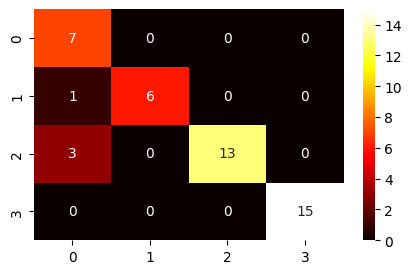

In [ ]:
# Estimate predictions and compute some metrics

predictions = clf.predict(X_test)

acc_b = accuracy_score(y_test, predictions)
cm_b = confusion_matrix(y_test, predictions)

# Print results
print(f"Accuracy: {acc_b}")

_,ax = plt.subplots(figsize=(5,3))
sns.heatmap(cm_b, annot=True, cmap='hot', ax=ax)

### Principal Component Analysis (PCA) -> [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 3, random_state=1 ) #

# Create reduced versions of subset
trans_train = pca.fit_transform(X_train, y_train)
trans_test = pca.transform(X_test)

print(trans_train.shape, trans_test.shape)

print(pca.explained_variance_)

(132, 3) (45, 3)
[0.08574135 0.03498187 0.01712877]


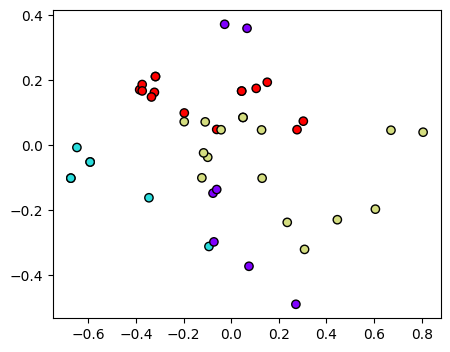

In [ ]:
# Plot transformed points
_,ax = plt.subplots(figsize=(5,4))
# axes[0].scatter(X_test[:,0], X_test[:,1],c=y_test, cmap="rainbow",edgecolors='k')
ax.scatter(trans_test[:,0], trans_test[:,1],c=y_test, cmap="rainbow",edgecolors='k')

In [ ]:
# Classify PCA features and compute predictions
clf = SVC(kernel='rbf')
clf.fit(trans_train, y_train)

SVC()

In [ ]:
# Clasification boundaries
x_min, x_max = _ , _
y_min, y_max = _ , _

x_grid, y_grid = np.meshgrid(np.linspace( _ , _ , 1000), np.linspace( _ , _ , 1000))
pred_grid = clf.predict(np.c_[x_grid.ravel(), y_grid.ravel()])
pred_grid = _

In [ ]:
# plot everything
_, ax = plt.subplots(figsize = (7,5))

ax.pcolormesh( _ , _ , _ , cmap = plt.cm.Paired) #, cmap = plt.cm.Paired

ax.scatter ( _ , _ , _ , edgecolor = 'k', cmap = plt.cm.Paired) # edgecolors = 'k',
ax.set_axis_off()

For PCA
Accuracy before: 0.911, - Now : 0.911 



<Axes: >

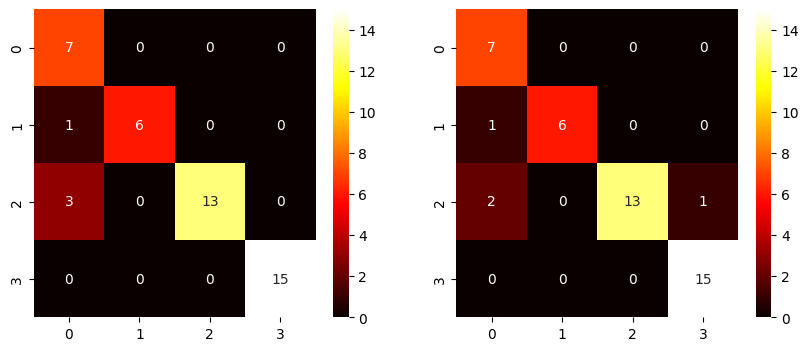

In [ ]:
# Comput metrics
predictions = clf.predict(trans_test)

acc_pca = accuracy_score(y_test, predictions)
cm_pca = confusion_matrix(y_test, predictions)
# Compare against original model
print("For PCA")
print("Accuracy before: {0:.3f}, - Now : {1:.3f} \n".format( acc_b , acc_pca ))

_,axes = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(cm_b, annot=True, cmap='hot', ax=axes[0])
sns.heatmap(cm_pca, annot=True, cmap='hot', ax=axes[1])

### Kernel PCA -> [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html)


In [ ]:
from sklearn.decomposition import KernelPCA

In [ ]:
kpca = KernelPCA(n_components = 2,kernel = 'rbf', random_state = 1 )

# Create reduced versions of subset
trans_train = kpca.fit_transform(X_train, y_train)
trans_test = kpca.transform(X_test)

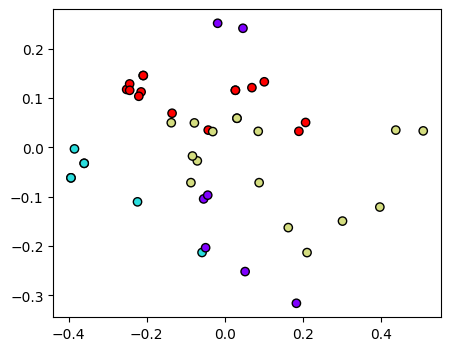

In [ ]:
# Plot transformed points
_,ax = plt.subplots(figsize=(5,4))
ax.scatter(trans_test[:,0], trans_test[:,1],c=y_test, cmap="rainbow",edgecolors='k')

In [ ]:
# Classify PCA features and compute predictions
clf = SVC(kernel='rbf')
clf.fit(trans_train, y_train)

SVC()

In [ ]:
# Clasification boundaries
x_min, x_max = _ , _
y_min, y_max = _ , _

x_grid, y_grid = np.meshgrid(np.linspace( _ , _ , 1000), np.linspace( _ , _ , 1000))
pred_grid = clf.predict(np.c_[x_grid.ravel(), y_grid.ravel()])
pred_grid = _

In [ ]:
# plot everything
_, ax = plt.subplots(figsize = (7,5))

ax.pcolormesh( _ , _ , _ , cmap = plt.cm.Paired) #, cmap = plt.cm.Paired

ax.scatter ( _ , _ , _ , edgecolor = 'k', cmap = plt.cm.Paired) # edgecolors = 'k',
ax.set_axis_off()

For PCA
Accuracy before: 0.911, - Now : 0.711 



<Axes: >

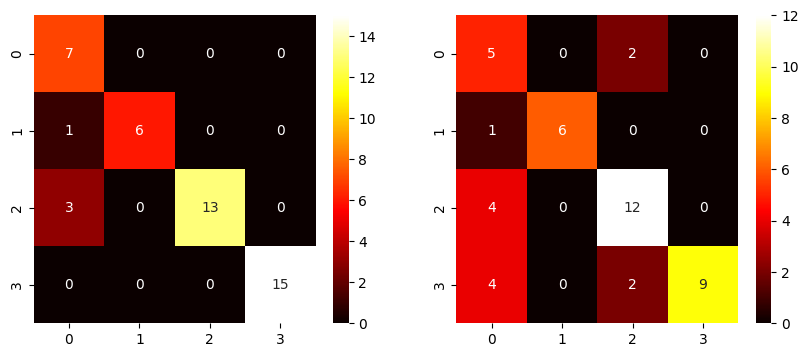

In [ ]:
# Comput metrics
predictions = clf.predict(trans_test)

acc_pca = accuracy_score(y_test, predictions)
cm_pca = confusion_matrix(y_test, predictions)
# Compare against original model
print("For PCA")
print("Accuracy before: {0:.3f}, - Now : {1:.3f} \n".format( acc_b , acc_pca ))

_,axes = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(cm_b, annot=True, cmap='hot', ax=axes[0])
sns.heatmap(cm_pca, annot=True, cmap='hot', ax=axes[1])